# Uses & pitfalls of linear regression

Sections:
* Inference vs. Prediction
* Design considerations
* Pitfalls

This lecture draws from Chapter 3 of James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). "An introduction to statistical learning: with applications in r."

---
# 1. Inference vs. prediction

In the last lecture we discussed how to both fit a linear regression model using OLS and evaluate a model goodness of fit. But in order to really gain knowledge from a linear regression model you have to know what you want to use the model for. In lecture 6 we talked about the fact that estimating $f()$ serves one of two purposes.

* **Inference:** Understand how $Y$ changes as a function of $X$ (i.e., develop a mechanistic understanding of $f()$. 

* **Prediction:** Characterize the probabilty of observing a given entry in $Y$ from a given entry in $X$. Here the goal is to _maximize control_ over $Y$.

With inference you learn how the different variables in $X$ relate to $Y$, while with prediction you learn how $f(X)$ as a whole gives you power in forecasting $Y$. These two are related but will determine how you evaluate your model.


---
## Inference

Inference from an estimated linear regression model gives you _insights_ into the data. Let's say that you estimate this linear regression model

$$ \hat{Y} = \hat{\beta}_0 + \hat{\beta}_1X_1 + \hat{\beta}_2X_2 $$

With inference questions, knowing the particular values of $\hat{\beta}_0, \hat{\beta}_1,$ and $\hat{\beta}_2$, as well as your certainty on the those values, is what is important.

The easiest way to see this is by example. Let's load up the Boston data set from the [MASS](https://cran.r-project.org/web/packages/MASS/MASS.pdf) package in R and explore what factors influence median housing values (_medv_).


In [1]:
# The MASS library should already be installed. 
# If not, then uncomment the following line when you first run this script
install.packages("MASS")

# Load the MASS package into workspace
library(MASS)

# If you want to look at what is included in the Boston dataset, uncomment the next line
#help(Boston)

# The Boston data set includes 14 variables
names(Boston)


The downloaded binary packages are in
	/var/folders/v6/g_3l5dn14cb48fvy3brt1zgr0000gq/T//RtmpLkbd6k/downloaded_packages


[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

These variables are:

* **crim:** per capita crime rate by town.

* **zn:** proportion of residential land zoned for lots over 25,000 sq.ft.

* **indus:** proportion of non-retail business acres per town.

* **chas:**  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

* **nox:** nitrogen oxides concentration (parts per 10 million).

* **rm:**  average number of rooms per dwelling.

* **age:** proportion of owner-occupied units built prior to 1940.

* **dis:**  weighted mean of distances to five Boston employment centres.

* **rad:**  index of accessibility to radial highways.

* **tax:** full-value property-tax rate per \$10,000.

* **ptratio:** pupil-teacher ratio by town.

* **black:** 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

* **lstat:** lower status of the population (percent).

* **medv:** median value of owner-occupied homes in \$1000s.

<br>
This data is sampled from 506 neighborhoods (i.e., n=506). Thus the full model that predicts median house value has 13 predictor variable (i.e., p=13).

In [71]:
# Before we can start analyzing this data set, we need to make it accessible 
attach(Boston)

# Now lets estimate our linear regression model predicting medv against all other 
# variables in the dataset
lm.fit = lm(medv~., data=Boston)

What we did above was load the Boston data set and learn the linear regression model with $Y=medv$ and $X$ being the remaining variables in the data set. 

<br>
In this case our model is

$$\hat{y}_{medv} = \hat{\beta}_0 + \hat{\beta}_{crim}X_{crim} + \hat{\beta}_{zn}X_{zn} + \hat{\beta}_{indus}X_{indus} \\ 
+ \hat{\beta}_{chas}X_{chas} + \hat{\beta}_{nox}X_{nox} + \hat{\beta}_{rm}X_{rm} + \hat{\beta}_{age}X_{age} \\
+ \hat{\beta}_{dis}X_{dis} + \hat{\beta}_{rad}X_{rad} + \hat{\beta}_{tax}X_{tax} + \hat{\beta}_{ptratio}X_{ptratio} \\
+ \hat{\beta}_{black}X_{black} + \hat{\beta}_{lstat}X_{lstat}$$

If we are asking inference questions, we can use the _summary_ function to report the summary statistics on all the regression coefficients.

In [13]:
# Report all model values
summary(lm.fit)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

For making an inference, the _coefficients_ table gives you everything you'll need to know. The first column is the magnitude of the regression coefficient for each item. The second column is the RSE for the coefficient. The third column gives you the converted _t-test_ for that coefficient (i.e., $t=\frac{\beta}{SE(\beta)}$). The fourth column shows the p-value for the t-test, with the asterisks signifying significance. 

<br>
Here we can evaluate the inferential value of this model in two ways.

* **Significance:** Is the magnitude of the estimated regression coefficient different than chance (i.e., $\beta=0$)?

* **Value:** How does each unit change in a predictor variable impact the value of $Y$?

In regards to the significance, we see that only two variables (_indus_ and _age_) are **not** significantly different from zero (indicated by the lack of asterisks next to the p-values). This means that we don't know if the age of houses in the neighborhood or the proportion of industry in the neighborhood will impact house values, but we cannot rule out the possibilty that they don't. All the other variables in the model do. 

Once we trim out variables based on their significance, we can take a closer look at the estimated coefficient values themselves. The units of the coefficients are always in the units of $Y$, with respect to step changes in $X$, which means in this case that they reflect dollars. Of the surviving terms in the model, we see that some have very high impacts on housing value. For example, the coefficients for number of rooms (_rm_) and proximity to the Charles River (_chas_) have the strongest influences on changes in the value of houses. In addition, the direction provides meaningful interpretations. In this case, crime rate (_crim_), nitrogen oxide concentration (_nox_), distance from employment hugs (_dis_), pupil-to-teacher ratio (_ptratio_), and lower SES status of the neighorhood (_lstat_) all bring down a house's value, while the other variables increase it.

Inferences like this are the standard use of regression models in psychology and neuroscience, however, estimating this model has other uses.


<br>

---
## Prediction

Rather than ask how each feature in $X$ relates to $Y$, you could ask a how well all the variables together can predict (or explain) $Y$. Here it is assumed that all the predictor variables in your model are relevant and all you want to know is how well it explains $Y$. For this the _model evaluation_ statistics described in the last lecture are relevant. 

If you take a look at the summary of the model fit we did above, you can see that we already got an estimate of the model's goodness of fit.

In [15]:
# Take another look at the end of the summary report
summary(lm.fit)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

You can see that we get all three model evaluation statistics: RSE, r-squared, and the F-statistic. In this case, what these are telling us is that our model predicts ~73% of the variance in housing prices ($r^2$) and the model predicts more than chance (p-value on the F-statistic is less than 0.05).

Of course, this is really telling us how well we can predict $Y$ in a very biased sense. Why is that? Becuase, we fit the model parameters on the same data set that we evaluated goodness of fit. So it's not so much a matter of telling us how well we could predict $Y$ from $X$ as much as it's telling us how well we can predict _this specific $Y$_ from _this specific $X$_.

If you want to truly understand the predictability that $f(X)$ has on $Y$, then you need to see how well the $f(X)$ you estimated can predict a separate data set that wasn't included in the model fitting process. Therefore, you need **2** data sets.

* **Training Set:** The data set that is used to fit $f(X)$.

* **Test Set:** The data set that is used to evaluate the learned $f(X)$.

Let's relearn our model of housing prices, but in this case split our data set into a _training_ and _test_ set.

In [69]:
# Set the random number seeding
set.seed(1)

# Take 1/2 of the observations (row) in the data set and
# use that to train the model
train=sample(1:506,253) # 253 unique samples from a list of 1-506
lm.fit=lm(medv~., data=Boston, subset=train)

# Notice how the inference results change from the smaller sample
summary(lm.fit)


Call:
lm(formula = medv ~ ., data = Boston, subset = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.4886 -2.7679 -0.5931  1.9448 23.6776 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  40.794784   6.923096   5.893 1.29e-08 ***
crim         -0.115243   0.042361  -2.720 0.006998 ** 
zn            0.055441   0.019524   2.840 0.004906 ** 
indus         0.048437   0.084965   0.570 0.569158    
chas          3.528135   1.142141   3.089 0.002245 ** 
nox         -15.525541   5.219120  -2.975 0.003233 ** 
rm            3.294243   0.556496   5.920 1.11e-08 ***
age          -0.004786   0.018521  -0.258 0.796304    
dis          -1.792620   0.271686  -6.598 2.66e-10 ***
rad           0.324190   0.091194   3.555 0.000456 ***
tax          -0.012715   0.005111  -2.488 0.013537 *  
ptratio      -0.923587   0.188053  -4.911 1.68e-06 ***
black         0.008797   0.003549   2.479 0.013869 *  
lstat        -0.657756   0.069912  -9.408  < 2e-16 ***
---
S

In [70]:
# Now we can evaluate the prediction on the non-training observations
y_hat = predict(lm.fit, Boston)[-train]

# Let's calculate RSS & TSS to make the r-squared & F-statistic
RSS = sum((medv[-train]-y_hat)^2)
TSS = sum((medv[-train]-mean(medv[-train]))^2)

# Calculate the r-squared
rsqr = 1-(RSS/TSS)
rsqr

# Calculate the F-statistic
F = ((TSS-RSS)/13)/(RSS/((506/2)-13-1))
F

[1] 0.6950922

[1] 41.91104

So here we see that the r-squared for the _test_ set (i.e., the data set that was not part of the model fit) is 0.695, so that we can predict 69.5% of the variance in a new batch of $Y$ observations. This is approximately as large as what we saw in the _training_ set. 

Moving onto the F-statistic, the F value seems fairly large. But we can directly calculate the p-value based on the two degrees of freedom from the model p (13) and n-p-1 (253-13-1 = 239). Here we will use the [_df_](http://sites.stat.psu.edu/~drh20/R/html/stats/html/Fdist.html) function which is the density function estimate for an f-statistic.

In [57]:
p = df(F,13,239)
p

[1] 6.556361e-54

With p<0.05, we can say that even in the hold out test set, we can reliably predict housing prices from these other neighborhood variables.

--- 
# 2. Other design considerations

How you interpret your linear regression results depends a lot on how you set up your model. Here are some design considerations to keep in mind.

<br>

## Binary variables

In linear regression, you can use binary variables (e.g., "dummy variables") as predictors. Doing so can provide a lot of useful interpretability. However, how you set up these variables will determine how you read your model.

Let us consider the case of a simple model where $X$ is a binary variable for _male_ & _female_. The form of $f(X)$ is simple

$$ Y = \hat{\beta}_0 + \hat{\beta}_1X $$

If we use $x=0$ for male and $x=1$ for female, then we can determine the effect of gender on $Y$ as

$$ male = \hat{\beta}_0 $$
$$ female = \hat{\beta}_0 + \hat{\beta}_1 $$

In this case, we are estimating the _mean_ for each gender based off of the model regression coefficients.

However, let's consider an alternate coding scheme using $x=-1$ for male and $x=1$ for female. In this case, we infer the gender effects as

$$ male = \hat{\beta}_0 - \hat{\beta}_1 $$
$$ female = \hat{\beta}_0 + \hat{\beta}_1  $$

In many ways using a binary {0,1} indicator gives you greater utility than other coding schemes. For example, let's consider the case where you have three groups instead of one. Let's say: male, female, & nonbinary. Using a {0,1} coding scheme you can model the effects of all three groups using 2 variables.

$$ Y = \hat{\beta}_0 + \hat{\beta}_1X_{male} + \hat{\beta}_2X_{female} $$

If $X_{male}$ is 1 if the subject is male and 0 otherwise, and $X_{female}$ is 1 if the subject is female, 0 otherwise, then you can get the mean effect of each group as.

$$ male = \hat{\beta}_0 + \hat{\beta}_1 $$
$$ female = \hat{\beta}_0 + \hat{\beta}_2 $$
$$ nonbinary = \hat{\beta}_0 $$

Therefore, if you have a single categorical variable, it is often easier to break it apart into separate binary indicator variables if you are using regression.

<br>

---

## Interaction terms

In the first lecture on this chapter, I mentioned how you can use regression to answer the same questions you'd use an ANOVA for. This means that you can look for main effect and interaction terms. Setting this up in linear regression looks like this.

$$ Y = \hat{\beta}_0 + \hat{\beta}_1X_1 + \hat{\beta}_2X_2 +  \hat{\beta}_3X_1X_2 $$

Here the main effects are represented by the $X_1$ and $X_2$ terms, while a new interaction term $X_1X_2$ is generated by taking the product of the two variables. Thus $\hat{\beta}_1$ and $\hat{\beta}_2$ are estimating the magnitude of the main effects, while $\hat{\beta}_3$ estimates the interaction.

Notice that you are actually leveraging some of the effects of violating the collinearity assumption here. We'll return to this issue at the end of the lecture.

Now one important thing to keep in mind is that if you are using regression to estimate main effects and interactions, you must include all main effects in the model _even if they are not statistically significant_ in the model evaluation. Why is this? Well let's play with some algebra. We can rewrite the model above as

$$ Y = \hat{\beta}_0 + (\hat{\beta}_1 + \hat{\beta}_3X_2)X_1 + \hat{\beta}_2X_2$$

If we want to be clever, we can rewrite this further as

$$ Y = \hat{\beta}_0 + \tilde{\beta}_1X_1 + \hat{\beta}_2X_2 $$

Here $\tilde{\beta}_1=(\hat{\beta}_1 + \hat{\beta}_3X_2)$, so even though you've gotten rid of the interaction term, $\tilde{\beta}_1$ still changes with $X_2$ and the effect of $X_1$ on $Y$ is no longer constant. Thus whenever modeling interactions, we follow the _hierarchical principle_.

* **Hierarchical principle:** When including an interaction in a model,  also include the main effects, even if the p-values associated with their coefficients are not significant, so as to account for the total variance.








---
# 3. Pitfalls to avoid

In the last lecture we discussed how violations of the four assumptions of OLS regression models can lead to a breakdown in the model fit or model evaluation process. Here we go over other problems that may arise that can impact the interpretability of your results.

<br>

## Outliers

Outliers in the context of linear regression are observations in $Y$ that are unusual with respect to their relationship to $X$. These are violations of the non-stationarity assumption.  In this context these are points that deviate far from expectations in your estimated $f(X)$. These are usually best seen in the residuals.


In [32]:
# Restrict plotting dimensions
options(repr.plot.width=4, repr.plot.height=4)

# Let's make a model with an outlier.
x = rnorm(100)
y = 0.5*x + rnorm(100)/2
y[10] = 10 # this will be our outlier

# Now let's fit the linear model
lm.fit=lm(y~x)
summary(lm.fit)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6714 -0.4036 -0.1325  0.1992 10.2683 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.06223    0.11517   0.540  0.59020   
x            0.35535    0.11333   3.135  0.00226 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.151 on 98 degrees of freedom
Multiple R-squared:  0.09117,	Adjusted R-squared:  0.0819 
F-statistic: 9.831 on 1 and 98 DF,  p-value: 0.002265


In order to visualize outliers, you want to look at the plot of the residuals.

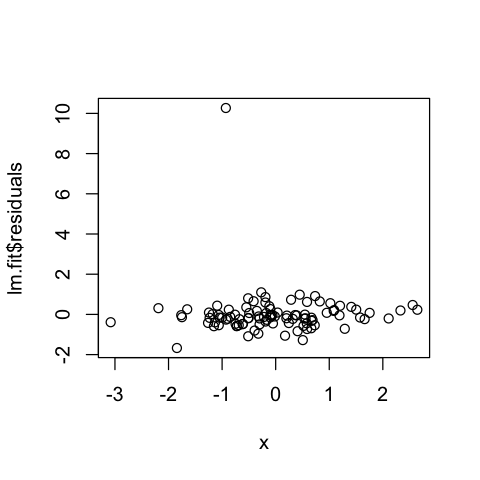

In [33]:
# Plot the residuals
plot(x,lm.fit$residuals)

The outlier is clearly visible here and not easily described by the best fitting line that would describe the rest of the data.

<br>

## High Leverage Points

The definition of outlier above defines it as an anomaly in $Y$. Anomalies in $X$, that have a particularly high influence on the estimation of $f(X)$, are called _high leverage points_. In regression, these are observations in $X$ that pull the line one direction or another. This is called _leverage_.

You can directly estimate leverage of every observation using a _leverage statistic (h)_. The leverage statistic for observation $i$ is

$$ h_i = \frac{1}{n} + \frac{(x_i - \bar{x})^2}{\sum_{i'=1}^{n} (x_{i'} - \bar{x})^2} $$

In this case $i'$ indicates all the other observations excluding $i$. Higher leverage means that these points will have a greater impact on the estimated regression line. 

Let's consider an example.




Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.64564 -0.49551 -0.01126  0.64454  2.27580 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.05929    0.09706   0.611    0.543    
x            0.59493    0.09192   6.472 3.84e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9663 on 98 degrees of freedom
Multiple R-squared:  0.2994,	Adjusted R-squared:  0.2923 
F-statistic: 41.89 on 1 and 98 DF,  p-value: 3.837e-09


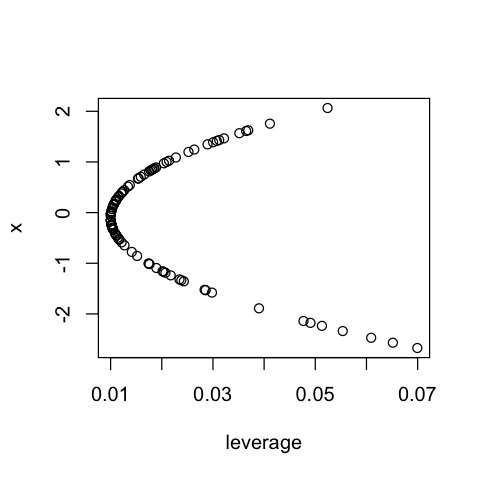

In [69]:
# Let's make a model with an outlier.
x = rnorm(100)
y = 0.5*x + rnorm(100)

# First let's see what low leverage looks like
lm.fit = lm(y~x)
summary(lm.fit)

# The function hatvalues() calculates the leverage for every observation
lv = hatvalues(lm.fit)
plot(lv,x,xlab="leverage",ylab="x")

Here there are no points that stand out as having high leverage. But now let's put some anomalies in $X$ to see what happens.


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.15287 -0.36753  0.01935  0.35316  1.02271 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.04555    0.05435  -0.838    0.404    
x            0.49616    0.01189  41.729   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5334 on 98 degrees of freedom
Multiple R-squared:  0.9467,	Adjusted R-squared:  0.9462 
F-statistic:  1741 on 1 and 98 DF,  p-value: < 2.2e-16


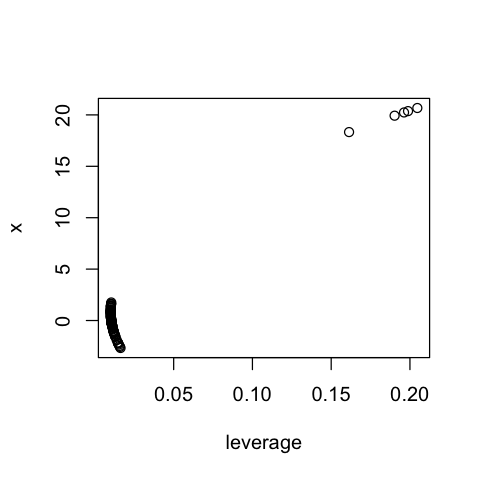

In [72]:
# Add in anomalies to the last five entries
#x[96:100]=rnorm(5)+10
x[96:100]=x[96:100]+10

y = 0.5*x + rnorm(100)/2

lm.fit = lm(y~x)
summary(lm.fit)

lv = hatvalues(lm.fit)
plot(lv,x,xlab="leverage",ylab="x")


As you can see, the leverage values for these new points is high, meaning that they have a stronger relative influence on the estimated regression line than the other observations. We can see this leverage effect by looking at the dramatic change in the regression coefficient values between the model with and without high leverage points.

## Collinearity

The problem of _collinearity_ refers to the case where two more more predictors in $X$ are related to each other. This ends up reducing the overall power of the estimated regression coefficients, thereby inflating $SE(\beta)$. Logically this is easy to see. Consider this model.

$$ Y = \hat{\beta}_0 + \hat{\beta}_1X_1 + \hat{\beta}_2X_2 $$

Now let's consider the extreme case where $X_1$ and $X_2$ are perfectly correlated (i.e., $X_1=X_2$). 

$$ Y = \hat{\beta}_0 + \hat{\beta}_1X_1 + \hat{\beta}_2X_2 \\
 = \hat{\beta}_0 + \hat{\beta}_1X_1 + \hat{\beta}_2X_1 \\
 = \hat{\beta}_0 + X_1(\hat{\beta}_1 + \hat{\beta}_2) \\
 = \hat{\beta}_0 + \tilde{\beta}X_1 $$

So here the real effect of $X_1$ on $Y$ is $\tilde{\beta}$, but in the original estimation step, where we assume they are independent, we estimate the coefficients individually. This means that $\hat{\beta}_1$ and $\hat{\beta}_2$ split the difference and each is 1/2 the value of $\tilde{\beta}$. As a result, the variance of the model (and residuals) becomes inflated.

We can estimate this effect using the _variance inflation factor (VIF)_. The VIF for each variable in $X$ is estimated as

$$ VIF = \frac{1}{1-r_{X_j|X_{-j}}^2} $$

Here $r_{X_j|X_{-j}}^2$ is the $r^2$ coefficient for a single predictor variable $X_j$ against all the other predictors $X_{-j}$. The closer that $r_{X_j|X_{-j}}^2$ gets to 1, the more likely it is that the target variable is correlated with the other variables. 